# Coursework TensorFlow
# SPCE0038: Machine Learning with Big-Data

---

## Overview

This coursework is provided as a Jupyter notebook, which you will need to complete.  

Throughout the notebook you will need to complete code, analytic exercises (if equations are required please typeset your solutions using latex in the markdown cell provided) and descriptive answers. Much of the grading of the coursework will be performed automatically, so it is critical you name your variables as requested.

Before you turn this coursework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove remove the `raise NotImplementedError()` exceptions that are thrown before you have added your answers. Do not add and remove cells but rather provide your answers in the spaces given.

Please also:

- Make sure you use a python environment using the requirements.txt files provided by the course.
- Make sure your notebook executes without errors.
- Do not add and remove cells but rather provide your answers in the spaces given.
- Do not overwrite or rename any existing variables.
- Do not install code or packages in the notebooks.
- Do not import any libraries other than modules from sklearn or TensorFlow.
- Always label your plots.

**Please rename the notebook filename to include your student number in the filename. And please also add your student number below:**

In [1]:
STUDENT_NUMBER = "23210403"

You will be able to run some basic tests in the notebook to check the basic operation of your code is as expected.  Although do not assume your responses are complete or fully correct just because the basic tests pass.

Once you have renamed the notebook file and completed the exercises, please upload the notebook to Moodle.


---

## Dependencies

- Standard course dependencies (e.g. numpy, scikit-learn, etc.)
- [TensorFlow](https://www.tensorflow.org/)
- [TensorFlow DataSets](https://www.tensorflow.org/datasets)

---

Notes for people running the notebook in Google Colab:

- This notebook uses quite a bit of RAM (the solutions run with ~8.5Gb of RAM), which means that if you are very inefficient in your memory usage, it will not fit within Colab's limits of 12Gb. If this is the case, you can try restarting the runtime to free up memory of variables you have created and that you no longer use or write your code in a more efficient way.
- You can enable a Runtime with GPU acceleration for faster training (Runtime -> Change runtime type)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

c:\Users\benny\anaconda3\envs\mlbd\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def check_var_defined(var):
    try:
        exec(var)
    except NameError:
        raise NameError(var + " not defined.")
    else:
        print(var + " defined.")

# Part 1: Data pre-processing


In these exercises we will look at the classification of flowers into 5 different classes using convolutional neural networks (CNNs). The implementation of this will be done using TensorFlow (TF).

The dataset can be loaded in using the [Tensorflow Datasets](https://www.tensorflow.org/datasets) package. Below you see how we load in the data and change it from a TF generator object into a list of the images and a list of the targets. 

In [3]:
# Load data
data = tfds.load('tf_flowers', split=["train"], as_supervised=True)

In [4]:
images, targets = zip(*[i for i in data[0]])
labels = ["dandelion", "daisy", "tulips",  "sunflowers", "roses"]

_Plot the first two images and their classes by writing a function `show_image`. Set the title of the images to be the class (use the actual label, not the number) it belongs to._ 

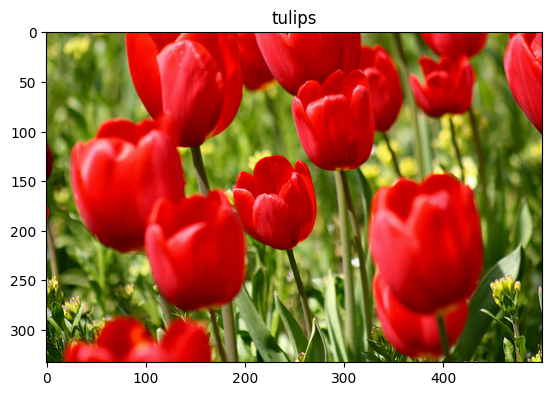

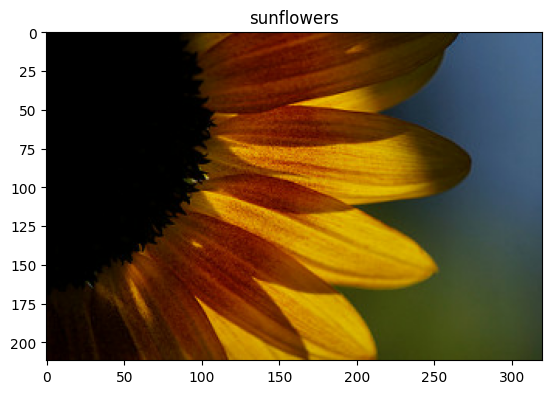

In [6]:
def show_image(image, target):
    # YOUR CODE HERE
    plt.figure()
    plt.imshow(image)
    plt.title(labels[target], fontsize=12)

for i in range(2):
    show_image(images[i], targets[i])

Before we can use the data to train neural networks, we need to pre-process the data such that:
    
- the images are all the same shape (224,224)
- the images, originally with values (0, 255), are mapped to have values between (0, 1)
- the labels are represented as one-hot vectors

_Write a function to rescale and resize the images._

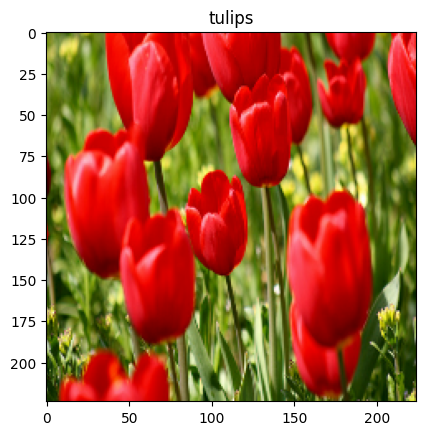

In [7]:
def rescale_and_resize(image):
    # YOUR CODE HERE
    height = 224
    width = 224
    preprocessed_image = tf.image.resize(images=image, size=[height, width], preserve_aspect_ratio=False)
    preprocessed_image = preprocessed_image / 255
    return preprocessed_image

show_image(rescale_and_resize(images[0]), targets[0])

In [8]:
check_var_defined('rescale_and_resize')

rescale_and_resize defined.


_Now use the function to pre-process the data in the variable `images` and save the preprocessed images in an np.ndarray `images_preprocessed`._

In [9]:
# YOUR CODE HERE
images_preprocessed = np.array([rescale_and_resize(x) for x in images])

In [10]:
check_var_defined('images_preprocessed')
assert type(images_preprocessed) == np.ndarray, "Make sure to store your answer as a np.ndarray"

images_preprocessed defined.


One approach to represent the image labels so that they can be trainable by a neural network is to represented them as a one-hot vector. 

_Write a function `one_hot_encoding` that takes the integer label and returns a one-hot vector of the label._

In [11]:
def one_hot_encoding(target):
    # YOUR CODE HERE
    layer = tf.keras.layers.CategoryEncoding(num_tokens=len(labels), output_mode="one_hot")
    return layer(target)

print(f"target: {targets[0]}, encoding: {one_hot_encoding(targets[0])}")

target: 2, encoding: [0. 0. 1. 0. 0.]


_Now use the function `one_hot_encoding` to create an np.ndarray of the one-hot representations of all the labels in `targets` and save them in `targets_preprocessed`._

In [12]:
# YOUR CODE HERE
targets_preprocessed = np.array([one_hot_encoding(y) for y in targets])

In [13]:
check_var_defined('targets_preprocessed')
assert type(targets_preprocessed) == np.ndarray, "Make sure to store your answer as a np.ndarray"

targets_preprocessed defined.


In this notebook you will train different models and compare them against each other. 

Now that the data is pre-processed. We will split the data in three datasets, a train, validation and test set. 

_Why do we need these three sets and what do we use them for._

With three separated datasets, we can have a better insight into our model's accuracy and identify which part of the model should be improved.

Training set is used for the model to learn from it, it helps the model to discover hidden data features and pattern.

Validation set is used to evaluate how well the model with the chosen hyperparameters performs. It helps us to select the appropriate hyperparameters for the model. 

Test set is used to evaluate the model performance and compare different models in an unbiased way.

_Now split the data such that we have a train set with 80\% of the samples and a validation and test set each with 10\% of the samples. Save the results in `x_train`, `y_train`, `x_val`, `y_val`, `x_test`, and `y_test`._

In [14]:
tf.keras.utils.set_random_seed(371947)
# YOUR CODE HERE

train_percentage = .8
validation_percentage = .1

num_data = len(images_preprocessed)
index = np.random.permutation(num_data)
images_preprocessed = images_preprocessed[index]
targets_preprocessed = targets_preprocessed[index]

x_train, x_val, x_test = images_preprocessed[:round(train_percentage * num_data)], images_preprocessed[round(train_percentage * num_data) : round((train_percentage + validation_percentage) * num_data)], images_preprocessed[round((train_percentage + validation_percentage) * num_data):]
y_train, y_val, y_test = targets_preprocessed[:round(train_percentage * num_data)], targets_preprocessed[round(train_percentage * num_data) : round((train_percentage + validation_percentage) * num_data)], targets_preprocessed[round((train_percentage + validation_percentage) * num_data):]

print(f"Train samples: {len(x_train)}, Validation samples: {len(x_test)}, Test samples: {len(x_val)}")

# value, count = np.unique(y_train, return_counts=True, axis=0)
# print(value, count)

Train samples: 2936, Validation samples: 367, Test samples: 367


In [15]:
check_var_defined('x_train')
check_var_defined('y_train')

check_var_defined('x_val')
check_var_defined('y_val')

check_var_defined('x_test')
check_var_defined('y_test')

x_train defined.
y_train defined.
x_val defined.
y_val defined.
x_test defined.
y_test defined.


WARNING: Before we continue we delete the variable `images_preprocessed` (you don't need that anymore) to manage our RAM consumption. If you want to use that variable again you will have to rerun the cell that creates it.

In [16]:
# Freeing up RAM by deleting this variable
del images_preprocessed

# Part 2: Training a basic CNN model 

Now that we have pre-processed the data and split it into different parts for training, validation and testing, you can start training some neural networks. 

Our model will take as input the $224 \times 224$ rgb (3-channel) images and will give as output a length five vector of which the different elements correspond to the five different classes. 

The model will start with convolutional layers followed by a hidden dense layer and then the final dense layer that gives us our output. 

_What kind of activation function should we use on the convolutional, dense and output layers and why these specific activation functions? (motivate your answers)_

ReLU activation function should be used on the convolutional and dense layers, Softmax activation function should be used on output layer.

Since our model consists of several hidden layers, our model might be suffering from vanishing gradient if Sigmoid or tanh is used. ReLU, Leaky ReLU and ELU are therefore more preferable activation functions for hidden layers.
To reduce computational demand and traing time, ReLU is usually the starting point for our model. If our model does suffer from dying neuron problem, we can switch to ELU.

On the other hand, since this is a multi-class classification problem, Softmax is used for output layer. The output of softmax is the probabilities of each possible outcome, so it is useful to determine which class the image belongs to.


_Create a model using the `tf.keras.models.Sequential()` model and add to that:_

- Input layer: A 2D convolutional layer with 8 filters, a 3x3 kernel and the ReLU activation function. Specify that this layer has an `input_shape` of (224, 224, 3)_ 
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 16 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 32 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 32 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A Flatten layer to flatten the filters to a single vector
- A Dense layer with 32 nodes and your chosen activation

- Output layer: A Dense layer with 5 nodes and your chosen activation

_Store the model in the variable `model_basic`._

In [17]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(93612)

# YOUR CODE HERE
model_basic = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation="relu", padding="same", input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPooling2D(strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=5, activation="softmax")
])

In [18]:
check_var_defined('model_basic')
model_basic.summary()

model_basic defined.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None,

To compile the model we need to specify a loss function. 

_What loss function would be appropriate for this multi-class classfication problem?_

_Also, during training we would like to monitor how well our model performs on predicting the targets. What would be a good metric to track? Motivate your answers._ 

Since this is a multi-class classificatioin problem, cross-entropy is the most appropriate loss function. According to keras API, as labels in training set are provided in the format of one-hot encoding, `CategoricalCrossentropy` should be used.

During training, `Accuracy` is a good metric to track as it provides a direct views to see how the model perform and whether it perform better and better over times. Accuracy is also helpful when tuning hyperparameter such as epochs.



Now compile the model using the `Adam` optimiser, your chosen loss, and your chosen metric to track. (Tip: TF has some loss function and metrics implemented in [tf.keras.losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses) and [tf.keras.metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics).)

In [19]:
# YOUR CODE HERE
model_basic.compile(loss="categorical_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["categorical_accuracy"])

In [20]:
check_var_defined('model_basic')

model_basic defined.


_Now fit the train data for 10 epochs and save the training history in the variable `history_basic`. Also specify the `validation_data` and a `batch_size` of 32._

In [21]:
tf.keras.utils.set_random_seed(47290)
# YOUR CODE HERE
history_basic = model_basic.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=32)

Epoch 1/10


92/92 [==============================] - 18s 184ms/step - loss: 1.4146 - categorical_accuracy: 0.3723 - val_loss: 1.1504 - val_categorical_accuracy: 0.5177
Epoch 2/10
92/92 [==============================] - 16s 177ms/step - loss: 1.1152 - categorical_accuracy: 0.5416 - val_loss: 1.0805 - val_categorical_accuracy: 0.5531
Epoch 3/10
92/92 [==============================] - 18s 191ms/step - loss: 1.0106 - categorical_accuracy: 0.5964 - val_loss: 0.9574 - val_categorical_accuracy: 0.6349
Epoch 4/10
92/92 [==============================] - 17s 187ms/step - loss: 0.8995 - categorical_accuracy: 0.6502 - val_loss: 0.9468 - val_categorical_accuracy: 0.6322
Epoch 5/10
92/92 [==============================] - 16s 175ms/step - loss: 0.8658 - categorical_accuracy: 0.6557 - val_loss: 0.8976 - val_categorical_accuracy: 0.6567
Epoch 6/10
92/92 [==============================] - 16s 174ms/step - loss: 0.7779 - categorical_accuracy: 0.6979 - val_loss: 0.9402 - val_categorical_accuracy: 0.6730
Epoch 7/1

In [22]:
check_var_defined('history_basic')
print(history_basic.history.keys())
print(history_basic.history['categorical_accuracy'])

history_basic defined.
dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])
[0.3722752034664154, 0.5415531396865845, 0.596389651298523, 0.6502043604850769, 0.6556539535522461, 0.6978882551193237, 0.7132152318954468, 0.7615804076194763, 0.7932561039924622, 0.8256130814552307]


_Now to see how the model performs, write a function `plot_metrics` that plots the loss for the train and validation set. In the same function also create a separate plot that plots the other metric for the train and validation set._

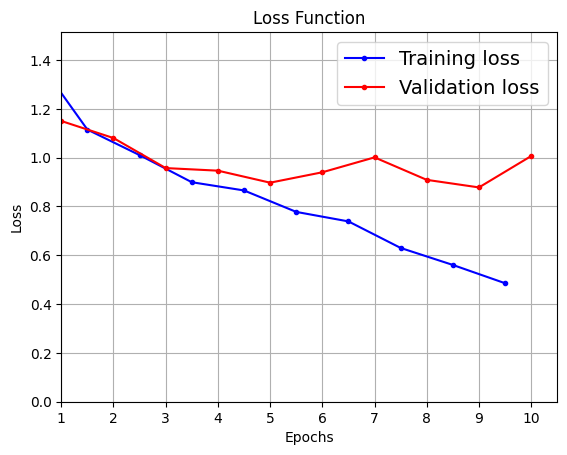

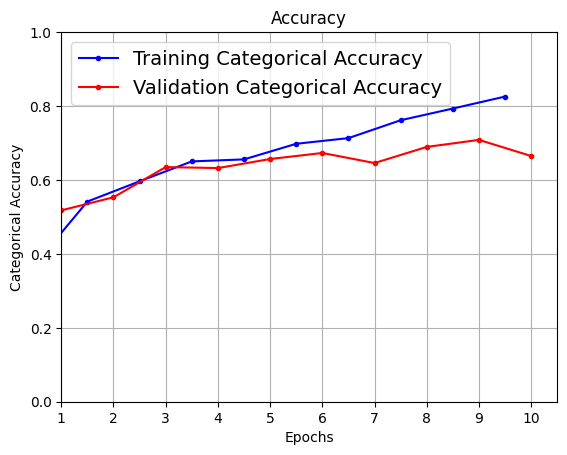

In [23]:
import matplotlib as mpl
def plot_metrics(history):
    # YOUR CODE HERE
    plt.figure()
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.plot(np.arange(len(history.history["loss"])) + 0.5, history.history["loss"], "b.-", label="Training loss")
    plt.plot(np.arange(len(history.history["val_loss"])) + 1, history.history["val_loss"], "r.-", label="Validation loss")
    plt.axis([1, len(history.history["loss"])+0.5, 0, np.max(history.history["loss"] + history.history["val_loss"]) + 0.1])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Function")
    plt.grid(True)

    plt.figure()
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.plot(np.arange(len(history.history["categorical_accuracy"])) + 0.5, history.history["categorical_accuracy"], "b.-", label="Training Categorical Accuracy")
    plt.plot(np.arange(len(history.history["val_categorical_accuracy"])) + 1, history.history["val_categorical_accuracy"], "r.-", label="Validation Categorical Accuracy")
    plt.axis([1, len(history.history["categorical_accuracy"])+0.5, 0, 1])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Categorical Accuracy")
    plt.title("Accuracy")
    plt.grid(True)


plot_metrics(history_basic)

_Comment on the performance of the model based the tracked loss and metric_

While the model achieved an accuracy of approximately 0.8 on the training set, its performance on the validation set was lower, with an accuracy of around 0.7 only. 
Also, the loss of validation did not decline over many epochs (5-10), therefore I believe the model can be further improved and achieve a higher accuracy.

*What happens if we were to train the model for more epochs? What will happen to the performance of the model?*

With more epochs, the model would have higher training accuracy but lower validation accuracy. As the result, the model might become more inaccurate.

From the plot of loss functions, it can be seen from epoch 5 to epoch 10, the validation loss was fluctuating at around 1.0 while training loss was decreasing. This suggests the model was overfitting.
With additional epochs, the training accuracy tends to continuously increase and the validation accuracy would fluctuate and start to decrease at some points.
As the consequences, the model will have higher error on unseen data, leading to less accuracy.

*Write a function `model_predict` that takes the model and some image data and returns the predicted targets (as integers corresponding to the predicted labels).* 

In [24]:
def model_predict(model, x):
    # YOUR CODE HERE
    y = model.predict(x)
    predicted_targets = np.argmax(y, axis=1)
    return predicted_targets

_Gather the targets of the test set (scalar integer value corresponding to the labels) and save them in `test_targets`._

_Compute the targets for `model_basic` and store them in the variable `test_targets_basic`._

In [25]:
# YOUR CODE HERE
test_targets = np.argmax(y_test, axis=1)
test_targets_basic = model_predict(model_basic, x_test)

12/12 [==============================] - 1s 42ms/step


In [26]:
check_var_defined('test_targets')
check_var_defined('test_targets_basic')

assert test_targets.ndim == 1, "Make sure you are only predicting the scalar label value not the one hot vectors"
assert test_targets_basic.ndim == 1, "Make sure you are only predicting the scalar label value not the one hot vectors"

test_targets defined.
test_targets_basic defined.


_Calculate the precision and recall averaged over the 5 classes. (Precision and recall for each classes and then avaraged in one score)_

In [27]:
from sklearn.metrics import precision_score, recall_score

def average_recall_precision(y, y_predict):
    # YOUR CODE HERE
    # precision_layer = tf.keras.metrics.Precision()
    # recall_layer = tf.keras.metrics.Recall()
    # precision_layer.update_state(y_true=y, y_pred=y_predict)
    # recall_layer.update_state(y_true=y, y_pred=y_predict)
    # precision = precision_layer.result()
    # recall = recall_layer.result()

    precision = np.sum(precision_score(y, y_predict, average=None)) / 5
    recall = np.sum(recall_score(y, y_predict, average=None)) / 5

    print(f"Average Recall: {recall:.3f}, Average Precision {precision:0.3f}")
    return recall, precision

recall_basic, precision_basic = average_recall_precision(test_targets, test_targets_basic)

Average Recall: 0.627, Average Precision 0.639


In [28]:
check_var_defined('recall_basic')
check_var_defined('precision_basic')

recall_basic defined.
precision_basic defined.


_Show the predicted targets in a confusion matrix. Show the predicted labels in percentages (percentage of the samples from true class labeled as predicted class) and add the labels to the axes._

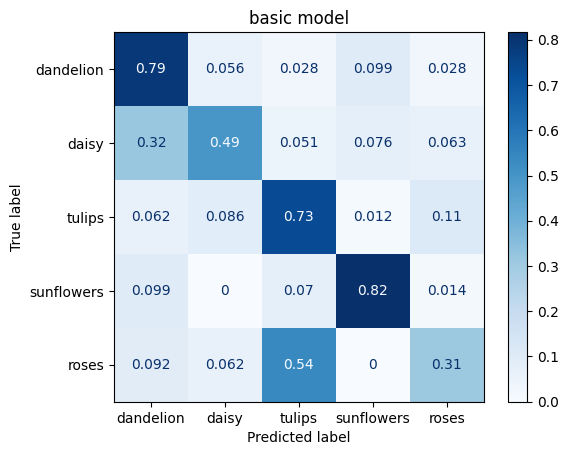

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y, y_pred, title=""):
    # YOUR CODE HERE
    m = confusion_matrix(y_true=y, y_pred=y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(m, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

plot_confusion_matrix(test_targets, test_targets_basic, "basic model")

_Comment on the recall and precision of the model, as well as the predictions in the confusion matrix._

Given that neither the recall nor the precision of the model is significantly lower compared to another, it appears that the model has achieved a good balance between precision and recall.

The confusion matrix demonstrates the model's proficiency in identifying dandelions, tulips, and sunflowers, but it appears to have low recall for daisy and roses. Specifically, the model frequently misclassifies daisies as dandelions, pointing to a need for model improvements to enhance differentiation between these two classes. A similar issue is observed with roses, which are often mistakenly identified as tulips.

# Part 3: Improving the model

To improve on the model we will include some Dropout layers. 

_What do dropout layers do and why might this increase the performance of our models?_

Dropout layer randomly removes a specified proportion of neurons from the previous layer during each iteration. It helps prevent overfitting by ensuring that the model does not become overly reliant on any single neuron, thereby improving model generalisation.

Also, it introduces some noises into the learning process, to prevent the model from memorising the training data too closely.

Another method to improve the model is by using a technique called data augmentation. 

_Explain the concept data augmentation and explain how it might increase the performance of our model._

Data augmentation artifically creates new data by introducing minor modifications to the exisitng data. In the context of image processing, this can include random alterations such as flipping, zooming, or rotating images during each training iteration. By presenting varied versions of the data, data augmentation effectively enhances the model's generalisation and reduces the likelihood of overfitting. This diversity in training data prepares the model to better handle unseen data, improving its performance when encountering new or varied inputs.

_Use the exact same model as for the `model_basic`, but play around with adding in a data augmentation layer (e.g. [tf.keras.layers.RandomFlip](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip) ) and adding in dropout layers (dropout is typically only added in the dense part of the network). Store the new model in the variable `model_dropout` and compile it using the same metrics and loss as before._

In [30]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(48263)

# YOUR CODE HERE
model_dropout = tf.keras.models.Sequential([
    tf.keras.layers.RandomZoom(height_factor=0.1, input_shape=[224, 224, 3]),
    tf.keras.layers.RandomRotation(factor=0.1),
    tf.keras.layers.Conv2D(filters=8, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=5, activation="softmax")
])

model_dropout.compile(loss="categorical_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["categorical_accuracy"])

In [31]:
check_var_defined('model_dropout')
model_dropout.summary()

model_dropout defined.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 224, 224, 3)       0         
 ation)                                                          
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (Non

_Fit the new model in the same way as before and save the history in `history_dropout`. However, train for 20 epochs instead of 10._

In [32]:
tf.keras.utils.set_random_seed(103745)
# YOUR CODE HERE
history_dropout = model_dropout.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=32)

Epoch 1/20
92/92 [==============================] - 19s 198ms/step - loss: 1.4132 - categorical_accuracy: 0.3641 - val_loss: 1.1860 - val_categorical_accuracy: 0.5177
Epoch 2/20
92/92 [==============================] - 20s 215ms/step - loss: 1.2845 - categorical_accuracy: 0.4680 - val_loss: 1.2404 - val_categorical_accuracy: 0.4714
Epoch 3/20
92/92 [==============================] - 19s 204ms/step - loss: 1.2362 - categorical_accuracy: 0.4806 - val_loss: 1.1087 - val_categorical_accuracy: 0.5313
Epoch 4/20
92/92 [==============================] - 18s 196ms/step - loss: 1.1983 - categorical_accuracy: 0.4966 - val_loss: 1.0348 - val_categorical_accuracy: 0.5640
Epoch 5/20
92/92 [==============================] - 18s 194ms/step - loss: 1.1569 - categorical_accuracy: 0.5235 - val_loss: 1.0311 - val_categorical_accuracy: 0.5531
Epoch 6/20
92/92 [==============================] - 18s 193ms/step - loss: 1.1292 - categorical_accuracy: 0.5327 - val_loss: 1.0094 - val_categorical_accuracy: 0.585

In [33]:
check_var_defined('history_dropout')

history_dropout defined.


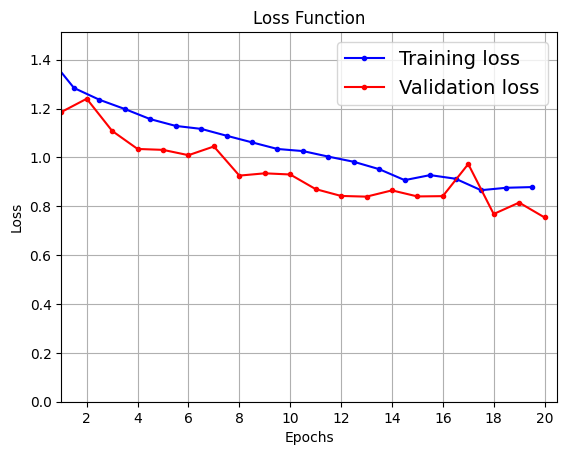

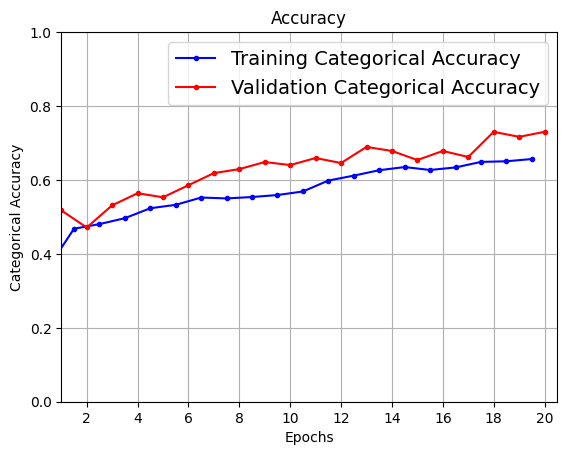

In [34]:
plot_metrics(history_dropout)

_Comment on the performance of the improved model based on the loss and metrics during training._

As can be seen from the plots, the validation accuracy was improved, which has reached approximately 0.75. Additionally, the two accuracies shows a positive trend over epochs, there is potential for further training to achieve higher accuracy and reduced loss. Therefore, the model might be more accuracted by adding additional epochs.

_Why did we have to train the model for more epochs than the basic model?_

With the implementation of dropout and data augmentation in the model, the training process is subject to increased noise and uncertainties due to the continuous variation in the data. These modifications would decelerate the learning process as the model encounters varied data in every iteration. Therefore, more epochs are required to enable the model to thoroughly extract and recognise the diverse characteristics of the data.

Now we evaluate our model on the test set using the functions you wrote before

12/12 [==============================] - 1s 39ms/step
Average Recall: 0.693, Average Precision 0.695


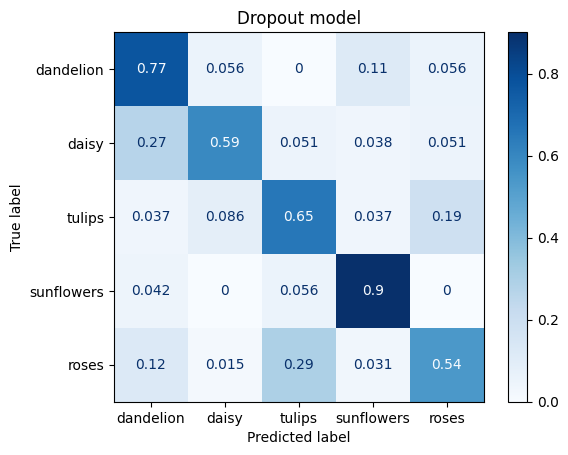

In [35]:
test_targets_dropout = model_predict(model_dropout, x_test)
recall_dropout, precision_dropout = average_recall_precision(test_targets, test_targets_dropout)    
plot_confusion_matrix(test_targets, test_targets_dropout, "Dropout model")

In [36]:
check_var_defined('test_targets_dropout')
check_var_defined('recall_dropout')

test_targets_dropout defined.
recall_dropout defined.


In [37]:
check_var_defined('test_targets_dropout')
check_var_defined('precision_dropout')

test_targets_dropout defined.
precision_dropout defined.


_Comment on the precision and recall of the model as well as the predictions in the confusion matrix_

The dropout model demonstrates higher average precision and recall compared to the basic model, indicating an improvement in performance. Analysis of the confusion matrix reveals that the accuracy for identifying daisy and roses has increased by 10% and 20%, respectively, albeit with a slight decrease in accuracy for the other categories. This trade-off suggests that the model sacrifices some precision in recognising dandelion and tulips to improve recall for daisy and roses. Overall, these adjustments have significantly enhanced the model performance.

# Part 4: Transfer learning

In order to improve our model even further, we will make use of transfer learning. 

_Explain in your own words what tranfer learning means and why it would help in our particular case._

In transfer learning, a pre-trained model on one task is used as the starting point for a model on another related task.

With transfer learning, since the model retains fundamental knowledge of the tasks, it can learn more effectively and has better performance.

In our case, since the training data is highly varied (there are humans in some images, the flower is sometimes single and sometime grouped) and different class shares similar features (like grasses), our model may learn slow and sometime gone wrong.
But with transfer learning, our model can effectively identify the important feature from the image (flower), so it can focus on learning differentiation between flowers.

Below you can see how we load in a pre-trained MobileNet that is trained on the ImageNet datastet. By not including the top part of the network we get only the convolutional layers and can add our own dense layers after that. We set all the layers of the MobileNet as not trainable, since this would be computationally expensive to do and we also want to avoid overfitting. Instead we will only be training the dense part. 

In [38]:
mobilenet = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(224, 224, 3),
    include_top=False, 
    weights='imagenet'
)

for layer in mobilenet.layers:
   layer.trainable = False

print("Output shape of the MobileNet: ", mobilenet.output_shape)

Output shape of the MobileNet:  (None, 7, 7, 1024)


_Use a sequential model and add the MobileNet, followed by a MaxPool2D layer, and then the dense part of the network which you can use the same as we have used in the previous models. Store the model in the variable `model_mobilenet`. Compile the model using the same metrics, loss and optimiser as before._

In [39]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(387453)

# YOUR CODE HERE
model_mobilenet = tf.keras.models.Sequential()
model_mobilenet.add(mobilenet)
model_mobilenet.add(tf.keras.layers.MaxPooling2D(strides=2))
model_mobilenet.add(tf.keras.layers.Flatten())
model_mobilenet.add(tf.keras.layers.Dense(units=32, activation="relu"))
model_mobilenet.add(tf.keras.layers.Dropout(rate=0.5))
model_mobilenet.add(tf.keras.layers.Dense(units=5, activation="softmax"))

model_mobilenet.compile(loss="categorical_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["categorical_accuracy"])

In [40]:
check_var_defined('model_mobilenet')
model_mobilenet.summary()

model_mobilenet defined.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 1024)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 32)                294944    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (N

*Train the model in the same way as before, for 10 epochs.*

In [41]:
tf.keras.utils.set_random_seed(9673)
# YOUR CODE HERE
history_mobilenet = model_mobilenet.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=32)

Epoch 1/10
92/92 [==============================] - 25s 260ms/step - loss: 1.4658 - categorical_accuracy: 0.3791 - val_loss: 1.1294 - val_categorical_accuracy: 0.5068
Epoch 2/10
92/92 [==============================] - 24s 257ms/step - loss: 1.2224 - categorical_accuracy: 0.4806 - val_loss: 0.9824 - val_categorical_accuracy: 0.7057
Epoch 3/10
92/92 [==============================] - 24s 261ms/step - loss: 1.1132 - categorical_accuracy: 0.4905 - val_loss: 0.7429 - val_categorical_accuracy: 0.7738
Epoch 4/10
92/92 [==============================] - 23s 253ms/step - loss: 1.0455 - categorical_accuracy: 0.5623 - val_loss: 0.7267 - val_categorical_accuracy: 0.8011
Epoch 5/10
92/92 [==============================] - 23s 254ms/step - loss: 1.0147 - categorical_accuracy: 0.5814 - val_loss: 0.6964 - val_categorical_accuracy: 0.8120
Epoch 6/10
92/92 [==============================] - 23s 253ms/step - loss: 0.9006 - categorical_accuracy: 0.6247 - val_loss: 0.6417 - val_categorical_accuracy: 0.822

In [42]:
check_var_defined('history_mobilenet')

history_mobilenet defined.


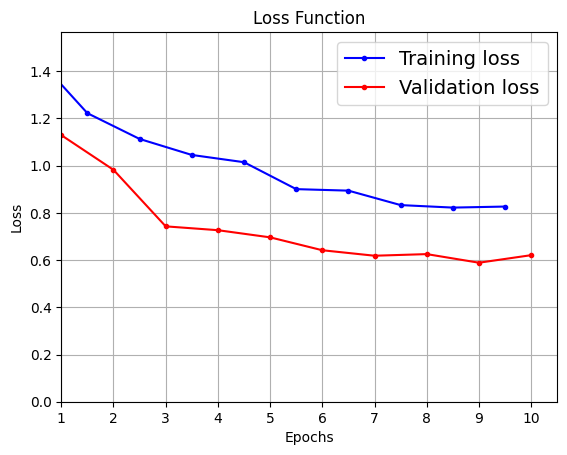

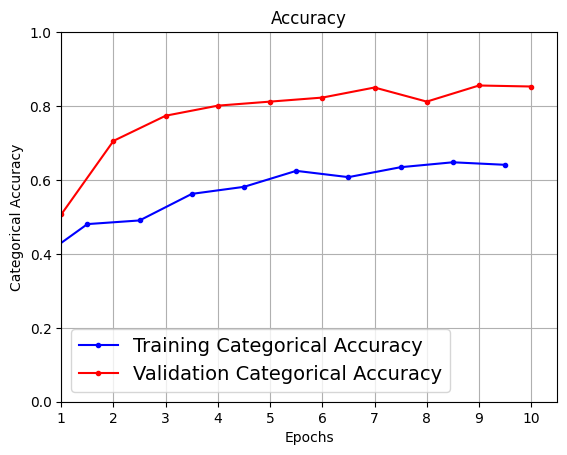

In [43]:
plot_metrics(history_mobilenet)

12/12 [==============================] - 3s 212ms/step
Average Recall: 0.863, Average Precision 0.870


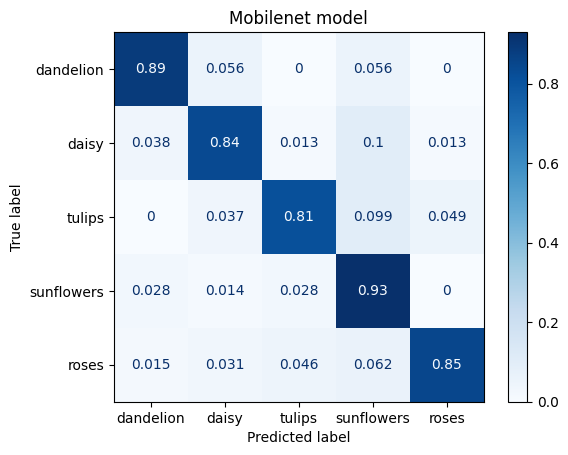

In [44]:
test_targets_mobilenet = model_predict(model_mobilenet, x_test)
recall_mobilenet, precision_mobilenet = average_recall_precision(test_targets, test_targets_mobilenet)    
plot_confusion_matrix(test_targets, test_targets_mobilenet, "Mobilenet model")

In [45]:
check_var_defined('test_targets_mobilenet')
check_var_defined('recall_mobilenet')


test_targets_mobilenet defined.
recall_mobilenet defined.


In [46]:
check_var_defined('precision_mobilenet')


precision_mobilenet defined.


_Comment on the results from the transfer-learned model and why the results differ to the case considered previously without transfer learning._

YOUR ANSWER HERE

_Suggest some ways the model could be improved further._

YOUR ANSWER HERE